In [234]:
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot
%matplotlib inline

In [250]:


def first_rk4(f,g,j,m, th10,th20,p10,p20, t0, stop, h):
    # solve y' = f(t, y), y(t0) = y0
    th1_value = list([th10])
    th2_value = list([th20])
    th1 = th10
    th2 = th20
    p1 = p10
    p2 = p20
    t = t0
    #print('t0', t, 'y0', y)
    # on calcule les coefficient en même temps 
    for i in range(int((stop - t0)/h)):
        k1 = h*f(th1,th2,p1,p2)
        l1 = h*g(th1,th2,p1,p2)
        j1 = h*j(th1,th2,p1,p2)
        m1 = h*m(th1,th2,p1,p2)
        k2 = h*f( th1 + 1/2 * k1,th2 + 1/2 * l1,p1 + 1/2 * j1,p2 + 1/2 * m1)
        l2 = h*g( th1 + 1/2 * k1,th2 + 1/2 * l1,p1 + 1/2 * j1,p2 + 1/2 * m1)
        j2 = h*j( th1 + 1/2 * k1,th2 + 1/2 * l1,p1 + 1/2 * j1,p2 + 1/2 * m1)
        m2 = h*m( th1 + 1/2 * k1,th2 + 1/2 * l1,p1 + 1/2 * j1,p2 + 1/2 * m1)
        k3 = h*f( th1 + 1/2 * k2,th2 + 1/2 * l2,p1 + 1/2 * j2,p2 + 1/2 * m2)
        l3 = h*g( th1 + 1/2 * k2,th2 + 1/2 * l2,p1 + 1/2 * j2,p2 + 1/2 * m2)
        j3 = h*j( th1 + 1/2 * k2,th2 + 1/2 * l2,p1 + 1/2 * j2,p2 + 1/2 * m2)
        m3 = h*m( th1 + 1/2 * k2,th2 + 1/2 * l2,p1 + 1/2 * j2,p2 + 1/2 * m2)
        k4 = h*f( th1 +  k3, th2 +  l3, p1 +  j3, p2 +  m3)
        l4 = h*g( th1 +  k3, th2 +  l3, p1 +  j3, p2 +  m3)
        j4 = h*j( th1 +  k3, th2 +  l3, p1 +  j3, p2 +  m3)
        m4 = h*m( th1 +  k3, th2 +  l3, p1 +  j3, p2 +  m3)
        #print('k1', k1, l1, j1, m1)
        #print('k2', k2, l2, j2, m2)
        #print('k3', k3, l3, j3, m3)
        #print('k4', k4, l4, j4, m4)
        th1 += 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        th2 += 1/6 * (l1 + 2*l2 + 2*l3 + l4)
        p1 += 1/6 * (j1 + 2*j2 + 2*j3 + j4)
        p2 += 1/6 * (m1 + 2*m2 + 2*m3 + m4)
        t += h
        th1_value.append(th1)
        th2_value.append(th2)
        #print('t', t, 'th1', th1, 'th2', th2 ,'p1', p1 , 'p2', p2)
    return th1_value,th2_value

In [253]:

G = 9.81
M = 1.000
L = 1.000
f = lambda th1,th2,p1,p2 : (6 /M*L**2) * (2*p1 - 3*np.cos(th1 - th2)*p2)/( 16 - 9*(np.cos(th1 - th2))**2) 
g = lambda th1,th2,p1,p2 : (6 / M*L**2) * (8*p2 - 3*np.cos(th1 - th2)*p1)/( 16 - 9*(np.cos(th1 - th2))**2)
j = lambda th1,th2,p1,p2 : (-(M * L**2)/2) * (((6 /M*L**2) * ((2*p1 - 3*np.cos(th1 - th2)*p2)/( 16 - 9*(np.cos(th1 - th2))**2)))* ((6 / M*L**2) * ((8*p2 - 3*np.cos(th1 - th2)*p1)/( 16 - 9*(np.cos(th1 - th2))**2))) * np.sin(th1-th2) + (3*G/L)*np.sin(th1))
m = lambda th1,th2,p1,p2 : (-(M * L**2)/2) * (-1*((6 /M*L**2) * ((2*p1 - 3*np.cos(th1 - th2)*p2)/( 16 - 9*(np.cos(th1 - th2))**2)))* ((6 / M*L**2) * ((8*p2 - 3*np.cos(th1 - th2)*p1)/( 16 - 9*(np.cos(th1 - th2))**2))) * np.sin(th1-th2) + (G/L)*np.sin(th2))
th1_value , th2_value =first_rk4(f , g , j , m, np.pi/2, np.pi/2, 0.000, 0.000, 0.000, 20.000, 0.001)


In [256]:
th2_value

[1.5707963267948966,
 1.5707984289377535,
 1.5708047353663095,
 1.5708152460804357,
 1.5708299610796297,
 1.5708488803625855,
 1.5708720039265909,
 1.5708993317667523,
 1.5709308638750477,
 1.570966600239207,
 1.5710065408414213,
 1.571050685656878,
 1.5710990346521256,
 1.5711515877832656,
 1.5712083449939718,
 1.5712693062133383,
 1.5713344713535546,
 1.5714038403074093,
 1.5714774129456206,
 1.5715551891139965,
 1.5716371686304214,
 1.571723351281672,
 1.5718137368200602,
 1.5719083249599055,
 1.5720071153738346,
 1.5721101076889104,
 1.5722173014825882,
 1.5723286962785032,
 1.5724442915420838,
 1.5725640866759958,
 1.5726880810154158,
 1.572816273823134,
 1.5729486642844859,
 1.5730852515021154,
 1.5732260344905675,
 1.573371012170712,
 1.5735201833639978,
 1.5736735467865397,
 1.5738311010430366,
 1.573992844620522,
 1.5741587758819482,
 1.5743288930596033,
 1.5745031942483632,
 1.5746816773987784,
 1.5748643403099962,
 1.5750511806225196,
 1.5752421958108034,
 1.575437383175689,

In [257]:
def get_xy(th1,th2):
    x1_value = list()
    y1_value = list()
    x2_value = list()
    y2_value = list()
    for i in range (len(th1)):
        x1 = np.sin(th1[i])
        y1 = (-1) * np.cos(th1[i])
        x2 = (np.sin(th1[i]) + np.sin( th2[i]))
        y2 = -(np.cos(th1[i]) + np.cos( th2[i]))
        x1_value.append(x1)
        y1_value.append(y1)
        x2_value.append(x2)
        y2_value.append(y2)
    return x1_value, y1_value, x2_value , y2_value

In [264]:

x1_value, y1_value, x2_value , y2_value = get_xy(th1_value,th2_value)


0.06008964502838976

In [259]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

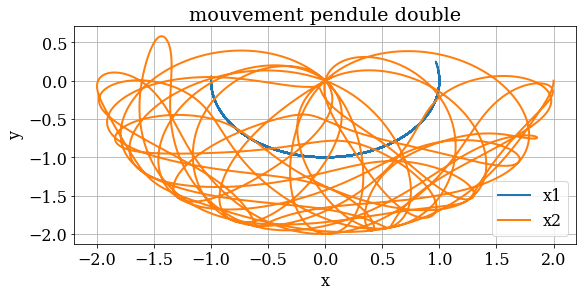

In [265]:
# Plot the path of the glider.
fig = pyplot.figure(figsize=(9.0, 4.0))
pyplot.title('mouvement pendule double')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.grid()
line1 = pyplot.plot(x1_value, y1_value,label = 'x1', color='C0', linestyle='-', linewidth=2);
line2 = pyplot.plot(x2_value, y2_value,label = 'x2', color='C1', linestyle='-', linewidth=2);
pyplot.legend();

In [267]:
def update_plot(n,x1_value,y1_value,x2_value,y2_value):
    fig.suptitle('Time step {:0>2}'.format(n))
    line1.set_xdata(x1_value[n])
    line1.set_ydata(y1_value[n])
    line2.set_xdata(x2_value[n])
    line2.set_ydata(y2_value[n])

In [269]:
nt = int(20.000/0.001)
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt,
                               interval=100)

In [270]:
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available